# [컴페티션] 머신러닝 성능 극대화
- 대회 주제 : Binary Classification with a Bank Churn Dataset
- 대회 링크 : https://www.kaggle.com/competitions/playground-series-s4e1
- 평가 항목 : ROC Curve
- 중간 제출일 : 2024년 12월 10일 화요일 7교시
- 평가 항목 점수 : 0.12345
- 수강생 성함 : 와와와

# ***Bank Churn  LightGBM and Catboost -  0.894547 Accuracy***

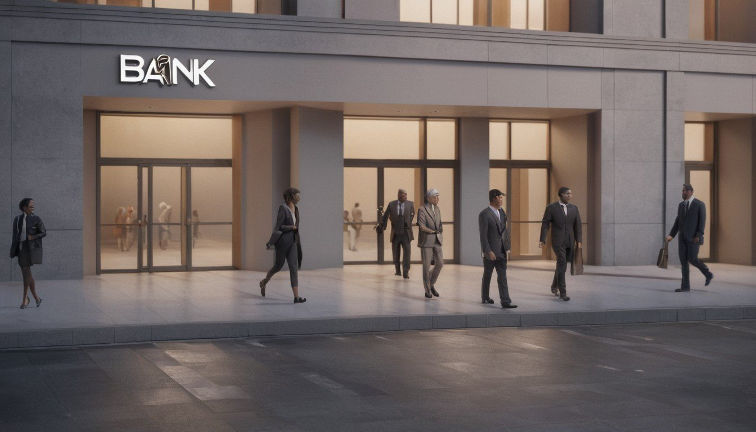

----
# ***Table Of Content***
---

1. [About The Team](#1-about-the-team)
2. [About Dataset](#2-about-dataset)
3. [Importing The Libraries](#3-importing-the-libraries)
4. [Basic Explorations](#4-basic-explorations)
   1. [Quick Overview](#4.1-quick-overview)
5. [Exploring the Train Dataset](#5-exploring-the-train-dataset)
   1. [Rows and Columns](#5.1-rows-and-columns)
   2. [Observation No 1](#5.2-observation-no-1)
6. [Descriptive Analysis](#6-descriptive-analysis)
   1. [Observation No 2](#6.1-observation-no-2)
7. [Checking The Null And Duplicate Values](#7-checking-the-null-and-duplicate-values)
8. [Lets Visualize the data](#8-lets-visualize-the-data)
   1. [Gender In The Dataset](#8.1-gender-in-the-dataset)
   2. [Geography In The Dataset](#8.2-geography-in-the-dataset)
   3. [Tenure In The Dataset](#8.3-tenure-in-the-dataset)
   4. [Number Of Products In The Dataset](#8.4-number-of-products-in-the-dataset)
   5. [Customer Having Credit Card In The Dataset](#8.5-customer-having-credit-card-in-the-dataset)
   6. [Active Customers In The Dataset](#8.6-active-customers-in-the-dataset)
   7. [Exited In The Dataset](#8.7-exited-in-the-dataset)
   8. [Credit Score In The Dataset](#8.8-credit-score-in-the-dataset)
   9. [Age In The Dataset](#8.9-age-in-the-dataset)
   10. [Balance In The Dataset](#8.10-balance-in-the-dataset)
   11. [Estimated Salary In The Dataset](#8.11-estimated-salary-in-the-dataset)
   12. [Countplot by Target](#812-countplot-by-target)
9. [Dealing with Outlier](#9-dealing-with-outliers)
10. [Preprocess Data](#10-preprocess-data)
    1. [Correlation Matrix](#101-correlation-matrix)
    2. [Numeric Feature Distribution](#102-numeric-feature-distribution)
11. [Model Building](#11-model-building)
    1. [Scaling Of Numeric Features](#111-scaling-of-numeric-features)
    2. [TF-IDF Vectorization for Surname](#112-tf-idf-vectorization-for-surname)
       -  [Some Questions you May Want To Ask](#some-questions-you-may-want-to-ask)
    3. [Feature Engineering](#113-feature-engineering)
    4. [X and y](#114-x-and-y)

12. [LightGBM Classifier](#12-lightgbm-classifier)
      1. [Feature Importance](#121-features-importance-lightgbm)
      2. [Code Working](#Code-Working-of-LightGBM)
      3. [Submission](#122-lightgbm-classifier-submission)
      4. [Override From Original Data](#123-override-from-original-dataset)
13. [Catboost Classifier](#13-catboost-classifier)
      1. [Submission Of Catboost Classifier](#131-submission-of-catboost-classifier)
14. [Conclusion](#14-conclusions)
   

---

# ***1. About The Team***
---

### *Team Members:*

| Name               | Email                       | Social Media                                          |
| ------------------ | --------------------------- | ----------------------------------------------------- |
| Mehak Iftikhar     | mehakkhan301007@gmail.com  | [LinkedIn](https://www.linkedin.com/in/mehak-iftikhar/), [Facebook](https://www.facebook.com/profile.php?id=61552023122774), [Twitter](https://twitter.com/mehakkhan874), [Kaggle](https://www.kaggle.com/mehakiftikhar), [Medium](https://medium.com/@mehakkhan301007), [GitHub](https://github.com/mehakiftikhar) |
| Muhammad Abdullah   | mrabdullah0303@gmail.com           | [Linkedin](https://www.linkedin.com/in/muhammad-abdullah-6b84b4297/?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app),[Kaggle](https://www.kaggle.com/abdmental01) [GitHub](https://github.com/muhammadabdullah0303)                          | 
| Saman Fatima        | samanfatimak7@gmail.com       | [Facebook](https://www.facebook.com/saman.fatima.50364592/), [GitHub](https://github.com/SamanFatima7), [Kaggle](https://www.kaggle.com/samanfatima7), [LinkedIn](https://www.linkedin.com/in/saman-fatima-datascience/), [Twitter](https://twitter.com/SamanFatima9106) |


----
# ***2. About Dataset***
---

`Title:` ***Bank Churn Binary Classification Problem***

`Dataset:` [link](https://www.kaggle.com/competitions/playground-series-s4e1/data)

`Columns Description:`

- *`Customer ID:` A unique identifier for each customer*
- *`Surname:` The customer's surname or last name*
- *`Credit Score:` A numerical value representing the customer's credit score*
- *`Geography:` The country where the customer resides (France, Spain or Germany)*
- *`Gender:` The customer's gender (Male or Female)*
- *`Age:` The customer's age.*
- *`Tenure:` The number of years the customer has been with the bank*
- *`Balance:` The customer's account balance*
- *`NumOfProducts:` The number of bank products the customer uses (e.g., savings account, credit card)*
- *`HasCrCard:` Whether the customer has a credit card (1 = yes, 0 = no)*
- *`IsActiveMember:` Whether the customer is an active member (1 = yes, 0 = no)*
- *`EstimatedSalary:` The estimated salary of the customer*
- *`Exited:` Whether the customer has churned (1 = yes, 0 = no)*

----
# ***3. Importing The Libraries***
---

In [ ]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window
%matplotlib inline

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
#Model
import lightgbm as lgb
from catboost import CatBoostClassifier, Pool
from catboost.utils import eval_metric

#Evaluation
from sklearn.metrics import roc_auc_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

----
# ***4. Basic Explorations***
---

> ####  _**4.1 Loading the Dataset**_

In [ ]:
# Load Submission Data 
df_submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')
# Load test Data 
df_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
# Load Train Dataset and show head of Data 
#Train Data 
df_train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

In [ ]:
# making a Copy of the Test Data for Future Use 
df_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
df_test_ov = df_test.copy()
df_test.head()

In [ ]:
# For Displaying Maximum Columns
pd.set_option('display.max_columns', None) 

> #### ***4.2 Quick Overview***

In [ ]:
df_train.head()

In [ ]:
df_test.head()

In [ ]:
df_submission.head()

> #### ***4.2 Shape of Datasets***

In [ ]:
# Checking the number of rows and columns

num_train_rows, num_train_columns = df_train.shape

num_test_rows, num_test_columns = df_test.shape

num_submission_rows, num_submission_columns = df_submission.shape

print("Training Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

print("Test Data:")
print(f"Number of Rows: {num_test_rows}")
print(f"Number of Columns: {num_test_columns}\n")

print("Submission Data:")
print(f"Number of Rows: {num_submission_rows}")
print(f"Number of Columns: {num_submission_columns}")

> #### ***4.3 Null Values in Datasets***

In [ ]:
# Null Values in Train 
train_null = df_train.isnull().sum().sum()

#Null Count in Test 
test_null = df_test.isnull().sum().sum()

#null Count in Submission
submission_null = df_submission.isnull().sum().sum()

print(f'Null Count in Train: {train_null}')
print(f'Null Count in Test: {test_null}')
print(f'Null Count in Submission: {submission_null}')

> #### ***4.4 Duplicates Values in Datasets***

In [ ]:
# Count duplicate rows in train_data
train_duplicates = df_train.duplicated().sum()

# Count duplicate rows in test_data
test_duplicates = df_test.duplicated().sum()

# Count duplicate rows in original_data
submission_duplicates = df_submission.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train_data: {train_duplicates}")
print(f"Number of duplicate rows in test_data: {test_duplicates}")
print(f"Number of duplicate rows in test_data: {submission_duplicates}")

----
# ***5. Exploring the Train Dataset***
---

[Back To Table Of Content](#table-of-content)


> #### ***5.1 Rows and Columns***

In [ ]:
# Checking the number of rows and columns
num_train_rows, num_train_columns = df_train.shape

print("Training Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")


> #### ***5.2 Data Summary***

In [ ]:
df_train.info()

> **5.2.1 Observation No 1** 

- *There are `165034` rows and `14` columns in the dataset.*
- *The columns having `float` datatypes are `5`, `integer` datatype `6`, `object` datatype are `3`*
- *The data does not contain any missing values*
- *The target variable in the dataset is `Exited`.*

----
# ***6. Descriptive Analysis***
---

[Back To The Table Of Content](#table-of-content)



> #### ***6.1 Descriptive View Of data***

In [ ]:
df_train.describe()

> _**6.1.1 Observation No 2**_ 

| **Category**              | **Description**                                     |
|---------------------------|-----------------------------------------------------|
| **Customer Demographics** | 1. The dataset contains information on 165,034 customers. <br> 2. Customer IDs range from 0 to 165,033. |
| **Credit Score and Age**  | 1. The average credit score is approximately 656.45. <br>2. The average age of customers is around 38.13 years. <br>3. The minimum credit score is 350, and the maximum is 850. |
| **Financial Status**      | 1. Customers typically have a balance of around $55,478.09, with a wide range up to $250,898.09. <br>2. The number of products per customer ranges from 1 to 4. |
| **Bank Services**         | 1. A significant proportion (around 75.4%) of customers have a credit card (HasCrCard). <br>2. Approximately 75.4% of customers are active members (IsActiveMember). |
| **Estimated Salary**      | 1. The estimated salary of customers has a mean of $112,574.82. <br>2. Salaries vary widely, with the minimum at $11.58 and the maximum at $199,992.48. |
| **Customer Churn**        | 1. About 21.2% of customers have exited the bank (Exited = 1). <br>2. The majority (about 78.8%) have not exited the bank (Exited = 0). |
| **Observations**          | 1. The dataset shows a diverse range of customer attributes and behaviors. <br>2. Understanding factors influencing customer churn, such as age, tenure, and product usage, could be crucial for the bank's retention strategies. <br>3. Further analysis and modeling may be required to uncover patterns and make predictions regarding customer churn. |


----
# ***7. Checking The Null And Duplicate Values***
---

[Back To The Table Of Content](#table-of-content)

> #### ***7.1 Null Values Of data***

In [ ]:
# Null Values in Train 
train_null = df_train.isnull().sum().sum()
print(f'Null Count in Train: {train_null}')

In [ ]:
# visual proof 
sns.heatmap(df_train.isnull(), cbar=False)
plt.show()

> #### ***7.2 Duplicates Values Of data***

In [ ]:
# Count duplicate rows in train_data
train_duplicates = df_train.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train_data: {train_duplicates}")


*Hence at this stage our dataset is Pure from missing values and Duplicated values , which is a good thing Now let Move toward Our Next Step*

----
# ***8. Lets Visualize the data***
---

In [ ]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#E8CE9D","figure.facecolor":"#E8CE9D","grid.color":"white"})
sns.set_context("poster",font_scale = .7)

# palette = ["#432C0A","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette = ["#764a23","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette_cmap = ["#6c9a76","#cc4b57","#764a23","#f25a29","#f7941d"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

[Back To The Table Of Content](#table-of-content)

> ### ***8.1 Gender In The Dataset***

[Back To The Table Of Content](#table-of-content)

In [ ]:


fig = plt.figure(figsize=(10, 5))

p = sns.countplot(y="Gender", data=df_train, palette=palette[0:2], edgecolor='#26090b', linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="center", color='#26090b', fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

plt.title("Distribution of Gender in df_train")
plt.xlabel("Count")
plt.ylabel("Gender")

plt.show()


> ### ***8.2 Geography In The Dataset***

[Back To The Table Of Content](#table-of-content)

In [ ]:
fig = plt.figure(figsize=(10, 5))


p = sns.countplot(y="Geography", data=df_train, palette=palette[0:2], edgecolor='#26090b', linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="center", color='#26090b', fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

plt.title("Distribution of Geography in df_train")
plt.xlabel("Count")
plt.ylabel("Geography")

plt.show()


> ### ***8.3 Tenure In The Dataset***

[Back To The Table Of Content](#table-of-content)

In [ ]:
fig = plt.figure(figsize=(10, 5))

p = sns.countplot(y="Tenure", data=df_train, palette=palette[0:2], edgecolor='#26090b', linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="edge", color='#26090b', fontsize=14, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 1, "alpha": 1})

plt.title("Distribution of Tenure in df_train")
plt.xlabel("Count")
plt.ylabel("Tenure")

plt.show()


> ### ***8.4 Number Of Products In The Dataset***

[Back To The Table Of Content](#table-of-content)

In [ ]:
fig = plt.figure(figsize=(10, 5))

p = sns.countplot(y="NumOfProducts", data=df_train, palette=palette[0:2]
                  , edgecolor='#26090b', linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="center", color='#26090b', fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

plt.title("Distribution of NumOfProducts in df_train")
plt.xlabel("Count")
plt.ylabel("NumOfProducts")

plt.show()


> ### ***8.5 Customer Having Credit Card In The Dataset***

[Back To The Table Of Content](#table-of-content)

In [ ]:
fig = plt.figure(figsize=(10, 5))

p = sns.countplot(y="HasCrCard", data=df_train, palette=palette[0:2]
                  , edgecolor='#26090b', linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="center", color="#26090b", fontsize=16, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

plt.title("Distribution of HasCrCard in df_train")
plt.xlabel("Count")
plt.ylabel("HasCrCard")

plt.show()


> ### ***8.6 Active Customers In The Dataset***

[Back To The Table Of Content](#table-of-content)

In [ ]:
fig = plt.figure(figsize=(10, 5))

p = sns.countplot(y="IsActiveMember", data=df_train, palette=palette[0:2], edgecolor='#26090b', linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="center", color="#26090b", fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

plt.title("Distribution of IsActiveMember in df_train")
plt.xlabel("Count")
plt.ylabel("IsActiveMember")

plt.show()


> ### ***8.7 Exited In The Dataset***

[Back To The Table Of Content](#table-of-content)

In [ ]:
fig = plt.figure(figsize=(10, 5))


p = sns.countplot(y="Exited", data=df_train, palette=palette[0:2], edgecolor='#26090b', linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="center", color="#26090b", fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

plt.title("Distribution of Exited in df_train")
plt.xlabel("Count")
plt.ylabel("Exited")

plt.show()


> ### ***8.8 Credit Score In The Dataset***
[Back To The Table Of Content](#table-of-content)

In [ ]:
# Create a histogram for the "CreditScore" column with specified colors
fig = plt.figure(figsize=(10, 6))

histplot = sns.histplot(data=df_train, x="CreditScore", bins=20, color='#26090b', edgecolor='#26090b', kde=True)

# Set the color for the kernel density line
histplot.get_lines()[0].set_color('#26090b')

# Calculate mean and median
mean_value = df_train["CreditScore"].mean()
median_value = df_train["CreditScore"].median()

# Add mean and median lines
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

# Set labels and title
plt.title("Distribution of CreditScore in df_train with Mean and Median")
plt.xlabel("CreditScore")
plt.ylabel("Count")

# Show legend
plt.legend()

plt.show()


> ### ***8.9 Age In The Dataset***
[Back To The Table Of Content](#table-of-content)

In [ ]:
# Create a histogram for the "Age" column with specified colors
fig = plt.figure(figsize=(10, 6))

histplot = sns.histplot(data=df_train, x="Age", bins=20, color='#26090b', edgecolor='#26090b', kde=True)

# Set the color for the kernel density line
histplot.get_lines()[0].set_color('#26090b')

# Calculate mean and median
mean_value = df_train["Age"].mean()
median_value = df_train["Age"].median()

# Add mean and median lines
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

# Set labels and title
plt.title("Distribution of Age in df_train with Mean and Median")
plt.xlabel("Age")
plt.ylabel("Count")

# Show legend
plt.legend()

plt.show()


> ### ***8.10 Balance In The Dataset***
[Back To The Table Of Content](#table-of-content)

In [ ]:
# Create a histogram for the "Balance" column with specified colors
fig= plt.figure(figsize=(10, 6))


histplot = sns.histplot(data=df_train, x="Balance", bins=20, color='#26090b', edgecolor='#26090b', kde=True)

# Set the color for the kernel density line
histplot.get_lines()[0].set_color('#26090b')

# Calculate mean and median
mean_value = df_train["Balance"].mean()
median_value = df_train["Balance"].median()

# Add mean and median lines
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

# Set labels and title
plt.title("Distribution of Balance in df_train with Mean and Median")
plt.xlabel("Balance")
plt.ylabel("Count")

# Show legend
plt.legend()

plt.show()

> ### ***8.11 Estimated Salary In The Dataset***
[Back To The Table Of Content](#table-of-content)

In [ ]:
# Create a histogram for the "EstimatedSalary" column with specified colors
fig = plt.figure(figsize=(10, 6))


histplot = sns.histplot(data=df_train, x="EstimatedSalary", bins=20, color='#26090b', edgecolor='#26090b', kde=True)

# Set the color for the kernel density line
histplot.get_lines()[0].set_color('#26090b')

# Calculate mean and median
mean_value = df_train["EstimatedSalary"].mean()
median_value = df_train["EstimatedSalary"].median()

# Add mean and median lines
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

# Set labels and title
plt.title("Distribution of EstimatedSalary in df_train with Mean and Median")
plt.xlabel("EstimatedSalary")
plt.ylabel("Count")

# Show legend
plt.legend()

plt.show()

> ### ***8.12 Countplot by Target***
[Back To The Table Of Content](#table-of-content)

In [ ]:
cat_cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember']

num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

target = 'Exited'

In [ ]:
fig = plt.figure(figsize=(14, len(cat_cols)*3))

# background_color = 'grey'
for i, col in enumerate(cat_cols):
    
    plt.subplot(len(cat_cols)//2 + len(cat_cols) % 2, 2, i+1)
    sns.countplot(x=col, hue=target, data=df_train, palette=palette[0:2], color='#26090b', edgecolor='#26090b')
    plt.title(f"{col} countplot by target", fontweight = 'bold')
    plt.ylim(0, df_train[col].value_counts().max() + 10)
    
plt.tight_layout()
plt.show()

---

# ***9. Dealing with Outliers***
---

[Back To The Table Of Content](#table-of-content)

In [ ]:
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Create subplots with two rows and two columns
fig = make_subplots(rows=2, cols=2)

# Background color
fig.update_layout(
    plot_bgcolor="#764a23",  # Set background color for the entire plot area
    paper_bgcolor="#E8CE9D",  # Set background color for the outer area
)

# Loop through numerical columns and add boxplots with color
for i, col in enumerate(num_cols, start=1):
    row_num = 1 if i <= 2 else 2
    col_num = i if i <= 2 else i - 2
    fig.add_trace(
        go.Box(
            x=df_train[col],
            name=col,
            marker_color='#26090b',  # Set box color
            line_color='#26090b'  # Set mean line color
        ),
        row=row_num,
        col=col_num
    )

# Update layout
fig.update_layout(
    title_text="Boxplots of Numerical Columns",
    showlegend=False
)

fig.show()

*I dont Think that we need to remove the outliers because in thic case the outliers are giving some insights about data.*


---
# ***10. Preprocess Data***
---
[Back To The Table Of Content](#table-of-content)

*In machine learning, preprocessing is a crucial phase that involves transforming raw data into a suitable format for model training. It encompasses tasks such as handling missing values, encoding categorical variables, scaling numerical features, and addressing outliers. Effective preprocessing ensures data quality, enhances model performance, and mitigates biases. It sets the foundation for accurate predictions by optimizing data representation and resolving potential issues. Ultimately, preprocessing is an indispensable step in the machine learning pipeline, facilitating the creation of robust, reliable models capable of extracting meaningful patterns from diverse datasets.*

In [ ]:
# Load Train Dataset and show head of Data 
#Train Data 
df_train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
df_train.head()

> ### ***10.1 Correlation Matrix***
[Back To The Table Of Content](#table-of-content)

*Correlation analysis in machine learning involves assessing the strength and direction of relationships between variables. This statistical technique helps identify patterns, dependencies, and potential insights within the data. By quantifying the degree of association, correlation analysis assists in feature selection, model interpretation, and understanding variable interactions. High correlation indicates a strong connection, while low correlation suggests a weaker relationship. Utilizing correlation analysis enhances the modeling process, enabling data scientists to make informed decisions about feature inclusion, reducing multicollinearity, and ultimately improving the accuracy and robustness of machine learning models.*

In [ ]:
# Checking Corr Matrix 
# Making New Data Frame . 
df_corr = df_train.copy()

catcol = [col for col in df_corr.columns if df_corr[col].dtype == "object"]
le = LabelEncoder()
for col in catcol:
        df_corr[col] = le.fit_transform(df_corr[col])


plt.subplots(figsize =(10, 10))

sns.heatmap(df_corr.corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='#e0b583',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

> ### ***10.2 Numeric Feature Distribution***
[Back To The Table Of Content](#table-of-content)

*In machine learning, understanding the distribution of numerical features is fundamental for data exploration. Analyzing the spread and central tendency of these features provides insights into their characteristics. Descriptive statistics, histograms, and box plots reveal data patterns, skewness, and potential outliers. A thorough grasp of feature distributions aids in choosing appropriate preprocessing techniques, such as normalization or transformation, ensuring optimal model performance. It enables practitioners to identify key trends, assess data quality, and make informed decisions when building and fine-tuning machine learning models.*

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 12), dpi = 300)
ax = ax.flatten()

numerical_variables = ['CreditScore','Age', 'Balance','EstimatedSalary' ]
for i, column in enumerate(numerical_variables):
    sns.kdeplot(df_train[column], ax=ax[i], palette=palette[0:2], color = '#26090b')        
    ax[i].set_title(f'{column} Distribution', size = 14)
    ax[i].set_xlabel(None)
    
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Train'])
plt.tight_layout()


---
# ***11. Model Building***
---
[Back To The Table Of Content](#table-of-content)

*In the model building section, a diverse ensemble of machine learning models including Random Forest, Logistic Regression, XGBoost (XGB), Support Vector Classifier (SVC), and K-Nearest Neighbors (KNN) is utilized. The models undergo training and evaluation with hyperparameter tuning. A comprehensive evaluation is conducted, considering accuracy, recall, precision, and the best parameters for each model. The process employs cross-validated grid search to optimize hyperparameters. The final selection is based on model performance metrics, providing a robust foundation for choosing the most effective model for the given dataset.*

> ### ***11.1 Scaling Of Numeric Features***
[Back To The Table Of Content](#table-of-content)

*In machine learning, scaling is a crucial preprocessing step that normalizes or standardizes features to a consistent range, ensuring fair treatment for all variables. Scaling enhances model performance by preventing certain features from dominating others and facilitates convergence in algorithms sensitive to input scale. It fosters more efficient and accurate model training, making it an essential practice for various machine learning tasks. Scaling ensures that each feature contributes proportionally to the model's learning process, promoting unbiased and reliable predictions across diverse datasets. In essence, scaling optimizes the performance and stability of machine learning models by harmonizing the influence of individual features.*

In [ ]:
numeirc_cols = ['Age','CreditScore', 'Balance','EstimatedSalary']
#Use Loop Function
for col in numeirc_cols:
    sc = MinMaxScaler()
    df_train[col+"_scaled"] = sc.fit_transform(df_train[[col]])
    df_test[col+"_scaled"] = sc.fit_transform(df_test[[col]])

[Back To The Table Of Content](#table-of-content)
> ### ***11.2 TF-IDF Vectorization for Surname***

***Credit** = @Aravind Pillai*

***Link** : https://www.kaggle.com/code/aspillai/bank-churn-dataset-classification-lightgbm?scriptVersionId=160081126&cellId=11*
 

**TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a technique commonly used in natural language processing (NLP) to represent textual data numerically. It converts a collection of text documents into a matrix of numerical features, where each row corresponds to a document, and each column corresponds to a unique term in the entire corpus*

**TF-IDF vectorization, as it is designed for processing and extracting features from textual information.*

**When we Apply TF-IDF to the "Surname" column in our dataset, we'll gain insights into the importance of different surnames across the entire dataset. TF-IDF will assign weights to each surname based on how frequently they appear in a particular entry (Term Frequency) and how unique they are across the entire dataset (Inverse Document Frequency).*

**Applying TF-IDF to the "Surname" column may necessitate preprocessing steps, such as handling variations in case or stemming, to ensure that similar surnames are treated consistently. Additionally, the TF-IDF scores can be used as features for machine learning models.*

**TF-IDF will highlight surnames that are unique or less common in the dataset. Surnames with higher TF-IDF scores are those that appear frequently in a specific record but less frequently across the entire dataset.*

**If you apply TF-IDF vectorization to this "Surname" column and then use techniques like dimensionality reduction with SVD, it makes sense in the context of processing textual data for machine learning. This approach can help capture the importance of different words (in this case, surnames) and potentially improve the performance of your machine learning model.*


In [ ]:
# Combining Customerid , Surname , Geography , and Gender , Estimated Slaray  and Making New Column in both Data Frames 
df_train['Sur_Geo_Gend_Sal'] = df_train['CustomerId'].astype('str')+df_train['Surname']+df_train['Geography']+df_train['Gender']+np.round(df_train.EstimatedSalary).astype('str')
df_test['Sur_Geo_Gend_Sal'] = df_test['CustomerId'].astype('str')+df_test['Surname']+df_test['Geography']+df_test['Gender']+np.round(df_test.EstimatedSalary).astype('str')

**The `get_vectors` function takes two DataFrames (`df_train` and `df_test`), and a specified column name (`col_name`). It performs the following steps:*

1. *Utilizes the `TfidfVectorizer` to transform the text data in the specified column into TF-IDF vectors, limiting the features to a maximum of 1000.*

2. *Applies dimensionality reduction using `TruncatedSVD` with 3 components to further transform the TF-IDF vectors.*

3. *Converts the transformed vectors into DataFrames (`tfidf_df_train` and `tfidf_df_test`).*

4. *Names the columns in the new DataFrames with a combination of the original column name and additional information.*

5. *Resets the index of the original DataFrames before concatenation.*

6. *Concatenates the transformed features with the original data along the columns.*

7. *Returns the modified training and testing DataFrames.*

*This function effectively combines TF-IDF vectorization and dimensionality reduction to enhance the original DataFrames with transformed features, facilitating machine learning tasks that involve text data.*

**The TF-IDF matrix can be high-dimensional, and TfidfVectorizer helps reduce this dimensionality, making it computationally more efficient and often improving model performance.*


In [ ]:
def get_vectors(df_train,df_test,col_name):

    vectorizer = TfidfVectorizer(max_features=1000)
    vectors_train = vectorizer.fit_transform(df_train[col_name])
    vectors_test = vectorizer.transform(df_test[col_name])
    
    #Dimensionality Reduction Using SVD ( Singular Value Decompostion)
    svd = TruncatedSVD(3)
    x_sv_train = svd.fit_transform(vectors_train)
    x_sv_test = svd.transform(vectors_test)

    # Convert to DataFrames
    tfidf_df_train = pd.DataFrame(x_sv_train)
    tfidf_df_test = pd.DataFrame(x_sv_test)

    # Naming columns in the new DataFrames
    cols = [(col_name + "_tfidf_" + str(f)) for f in tfidf_df_train.columns.to_list()]
    tfidf_df_train.columns = cols
    tfidf_df_test.columns = cols

    # Reset the index of the DataFrames before concatenation
    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # Concatenate transformed features with original data
    df_train = pd.concat([df_train, tfidf_df_train], axis="columns")
    df_test = pd.concat([df_test, tfidf_df_test], axis="columns")
    return df_train,df_test

> ### ***Some Questions you May Want To Ask***
[Back To The Table Of Content](#table-of-content)

---

_***Question1**: Why is **TfidfVectorizer** used, and what is the significance of `max_features=1000`?_

_Answer: **TfidfVectorizer** is used to convert text data into TF-IDF features, which capture the importance of terms in a document collection. `max_features=1000` limits the number of unique terms considered to the top 1000 most frequent terms. This helps control the dimensionality of the resulting TF-IDF matrix, focusing on the most informative features._

---

_***Question2**: What is the purpose of applying **TruncatedSVD** for dimensionality reduction?_

*Answer: **TruncatedSVD** is applied to reduce the dimensionality of the TF-IDF matrix. This is done to mitigate the "curse of dimensionality" and to speed up subsequent machine learning algorithms. In this case, it reduces the number of features from the TF-IDF vectorization to three components*

---

_***Question3**: Why are the transformed features stored in new DataFrames (`tfidf_df_train` and `tfidf_df_test`)?_

*Answer: The transformed features obtained after applying TruncatedSVD are stored in new DataFrames (`tfidf_df_train` and `tfidf_df_test`). This is done for clarity and to facilitate easy naming of the new features. It allows for a clear separation between the original features and the newly created TF-IDF features.*

---

_****Question4**: How are the columns of the new DataFrames (`tfidf_df_train` and `tfidf_df_test`) named?*_

*Answer: The columns of the new DataFrames are named using a suffix that includes the original column name (`col_name`), the term "tfidf," and the index of the TruncatedSVD components. For example, if the original column name is "text," the new columns might be named "text_tfidf_0," "text_tfidf_1," and "text_tfidf_2."*

In [ ]:
df_train,df_test = get_vectors(df_train,df_test,'Surname')
df_train,df_test = get_vectors(df_train,df_test,'Sur_Geo_Gend_Sal')

In [ ]:
# Head Of Train after Vectorization
df_train.head()

> ### ***11.3 Feature Engineering***
[Back To The Table Of Content](#table-of-content)

*The `getFeats` function enhances a given DataFrame by creating new features based on existing ones. Here's a concise summary of the code:*

1. ***Senior:** Adds a binary column indicating whether a person is a senior (age 60 or above).*

2. ***Active_by_CreditCard:** Multiplies the binary columns 'HasCrCard' and 'IsActiveMember' to create a new feature.*

3. ***Products_Per_Tenure:** Calculates the ratio of 'Tenure' to 'NumOfProducts' and creates a new column.*

4. ***AgeCat:** Divides ages by 20, rounds the result, and converts it to a categorical variable.*

5. ***One-Hot Encoding:** Converts categorical columns ('Geography', 'Gender', 'NumOfProducts', and 'AgeCat') into dummy variables using one-hot encoding.*

*The function then returns the modified DataFrame with these additional features.*

In [ ]:
def feature_data(df):
    
    df['Senior'] = df['Age'].apply(lambda x: 1 if x >= 60 else 0)
    df['Active_by_CreditCard'] = df['HasCrCard'] * df['IsActiveMember']
    df['Products_Per_Tenure'] =  df['Tenure'] / df['NumOfProducts']
    df['AgeCat'] = np.round(df.Age/20).astype('int').astype('category')
    
    cat_cols = ['Geography', 'Gender', 'NumOfProducts','AgeCat']
    #onehotEncoding
    df=pd.get_dummies(df,columns=cat_cols)
    return df

In [ ]:
#Genrating New Features
df_train = feature_data(df_train)
df_test = feature_data(df_test)

##Selecting Columns FOr use 
feat_cols=df_train.columns.drop(['id', 'CustomerId', 'Surname','Exited','Sur_Geo_Gend_Sal'])
feat_cols=feat_cols.drop(numeirc_cols)

#Printing
print(feat_cols)
df_train.head()

> ### ***11.4 X and y***
[Back To The Table Of Content](#table-of-content)

In [ ]:
X=df_train[feat_cols]
y=df_train['Exited']

In [ ]:
# Head Of Data
X.head()

In [ ]:
print(f'The Shape Of X is {X.shape}')

<!-- <center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:White;font-size:200%;font-weight: 500;color:Black;overflow:hidden;">LGBMClassifier</span> -->

---
#  ***12. LightGBM Classifier*** 
---
[Back To The Table Of Content](#table-of-content)

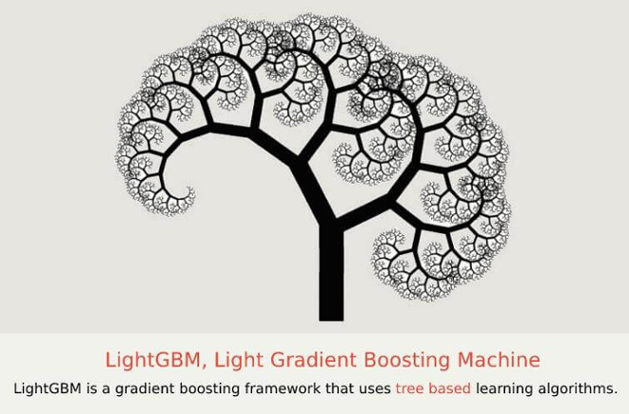
Pic Credit : Analytic Vidhya

> ### ***1. Definition***:

*Light GBM (Gradient Boosting Machine) is a gradient boosting framework that uses tree-based learning algorithms. It's designed for speed and efficiency, particularly on large datasets, by utilizing a histogram-based approach for tree construction.*

> ### ***1. Key Characteristics:***

   - *a. Gradient Boosting:*
      - *It is an ensemble learning method that builds a series of weak learners (usually decision trees) to create a strong learner.*

   - *b. Leaf-Wise Growth:*
      - *Light GBM grows trees leaf-wise instead of level-wise, leading to faster training times.*

   - *c. Histogram-Based Learning:*
      - *Utilizes histograms to find the best splits during tree growth, reducing memory usage and improving computational efficiency.*

> ### ***2. Advantages:***

   - *a. High Performance:*
      - *Faster training and higher efficiency, especially on large datasets.*

   - *b. Reduced Memory Usage:*
      - *Uses histogram-based learning to optimize memory consumption.*

   - *c. Parallel and Distributed Training:*
      - *Supports parallel and distributed computing, enhancing scalability.*

> ### ***3. How it Works:***

*- Leaf-Wise Tree Growth:*
  - *Light GBM grows trees by expanding the leaf with the maximum delta loss.*

*- Histogram-Based Split Finding:*
  - *Utilizes histograms to find optimal split points during tree construction, reducing computational complexity.*

> ### ***Summary:***
*Light GBM is a high-performance gradient boosting framework for efficient tree-based machine learning, employing a leaf-wise growth strategy and histogram-based learning, ideal for large datasets and tasks where speed is paramount.*
*"Paramount" means of chief importance or significance. In the context of the sentence I provided, it implies that Light GBM is particularly well-suited for tasks where speed is considered the most crucial or significant factor.*

In [ ]:
# LightGBM Parameters
lgbParams = {'n_estimators': 1000,
             'max_depth': 25, 
             'learning_rate': 0.025,
             'min_child_weight': 3.43,
             'min_child_samples': 216, 
             'subsample': 0.782,
             'subsample_freq': 4, 
             'colsample_bytree': 0.29, 
             'num_leaves': 21}

> ### ***12.1 Features Importance LightGBM***
[Back To The Table Of Content](#table-of-content)

In [ ]:
# Feature Importance Using LightGBM
lgb_model=lgb.LGBMClassifier(**lgbParams)
lgb_model.fit(X,y)
lgb.plot_importance(lgb_model, importance_type="gain", figsize=(8,6), max_num_features=12, color = "black",
                    title="LightGBM Feature Importance (Gain)")
plt.show()

[Back To The Table Of Content](#table-of-content)
> ### ***Code Working of LightGBM***

***Objective:***
*The code performs model training using LightGBM with Stratified K-Fold cross-validation and evaluates the model's performance on each fold.*

***Steps:***
1. ***Data Preparation:***
   - *`X` and `y` are defined using features and target variable from the training dataset (`df_train`).*
   - *`train_test_split` is used to create training and test sets (`X_train`, `X_test`, `y_train`, `y_test`).*

2. ***Model Training and Cross-Validation:***
   *- Stratified K-Fold with 7 splits is initialized.*
   *- For each fold:*
      - *The training data is split into training and validation sets.*
      - *A LightGBM classifier is created and trained on the training set.*
      - *Model performance is evaluated on the validation set using AUC as the evaluation metric.*
      - *Predictions are made on the test set for later aggregation.*

3. ***Results and Summary:***
   - *AUC values for each fold are printed, indicating the model's performance on different subsets of the data.*
   - *Optionally, the mean AUC value across all folds is computed and printed.*

***Summary Statement:***
*The code trains a LightGBM classifier using Stratified K-Fold cross-validation, assessing its performance on each fold by calculating the AUC.This process is repeated for 10 folds, and the AUC values are displayed. Additionally, the mean AUC across all folds is provided for an overall evaluation of the model's predictive ability.*

In [ ]:
# Features to use
feat_cols = X.columns

#Intilize folds 
n = 10

# Initialize StratifiedKFold
folds = StratifiedKFold(n_splits=n, random_state=42, shuffle=True)
test_preds = np.empty((n, len(df_test)))
auc_vals = []

# Loop through folds 
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    ''' in each iteration of the cross-validation loop, the model is trained on a specific subset 
    of the data (training set) and validated on a different subset (validation set), facilitating the evaluation of the model's performance 
    across diverse portions of the dataset.'''
    X_train_fold, y_train_fold = X.iloc[train_idx], y.iloc[train_idx]
    X_test_fold, y_test_fold = X.iloc[valid_idx], y.iloc[valid_idx]
    
    #LGB Classifier
    lgb_model = lgb.LGBMClassifier(**lgbParams)
    
    #Fitting the model
    lgb_model.fit(X_train_fold, y_train_fold,
            eval_set=[(X_test_fold, y_test_fold)],
            eval_metric='auc',verbose=False)
    
    #Predicting on validation set and Printing Results.
    y_pred_val = lgb_model.predict_proba(X_test_fold[feat_cols])[:, 1]
    auc_val = roc_auc_score(y_test_fold, y_pred_val)
    print(f"AUC for fold {n_fold}: {auc_val}")
    auc_vals.append(auc_val)
    
    y_pred_test_light = lgb_model.predict_proba(df_test[feat_cols])[:, 1]
    test_preds[n_fold, :] = y_pred_test_light
    print("---------Fold Completed--------")
print('\n **** Loop finished Successfully **** ')

In [ ]:
#The mean AUC value across all folds
mean_auc_light = np.mean(auc_vals)
print(f"\nMean AUC Of LightGBM : {mean_auc_light}")

<!-- <center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:WHite;font-size:200%;font-weight: 500;color:Black;overflow:hidden;">Submission File for LightGBM</span> -->
---
### ***12.2 LightGBM Classifier Submission*** 
---

In [ ]:
y_pred_light = test_preds.mean(axis=0)

In [ ]:
# # Create a DataFrame for the submission
# submission_df = pd.DataFrame({'id': df_test['id'], 'Exited': y_pred})

# # Save the submission DataFrame to a CSV file
# submission_df.to_csv('submission_act_1.csv', index=False)
# # 
# print("Submission file created successfully!")


<!-- <center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:White;font-size:200%;font-weight: 500;color:Black;overflow:hidden;">Override from Original Dataset.</span> -->

---
### ***12.3 Override from Original Dataset*** 
---

*Add a feature from the original data to account for leakage. for all matching rows between ORIGINAL and TRAIN, the labels are reversed*

### ***Credit : @paddykb***
https://www.kaggle.com/competitions/playground-series-s4e1/discussion/469859

**Added ~0.003 to LB score from data leakage. Best LB score without override for this notebook is 0.89315*

In [ ]:
#Importing the Orginal Dataset 
df_orig=pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
#Extracting the Column name From the Original Dataset
orig_cols=list(df_orig.columns.drop(['RowNumber','Exited']))

# Renaming the Column Exited With Exited_Orig in the Original Dataset
df_orig.rename(columns={'Exited':'Exited_Orig'},inplace=True)

# Here the Tricky part , Reversing the Label , Example Where [Exited is 1 , we replace it with 0] and Where Exited is 0 we replace it with 1.
df_orig['Exited_Orig']=df_orig['Exited_Orig'].map({0:1,1:0})

# Now we are Merging The Original Dataset And Testing Dataset It performs a left join based on specified columns (orig_cols)
# and selects specific columns of interest. The resulting DataFrame includes the original exit status ('Exited_Orig') for corresponding
# 'id' values, and missing values are filled with -1.
df_test_merg=df_test_ov.merge(df_orig,on=orig_cols,how='left')[['id','Exited_Orig']].fillna(-1)

# Creating a Submission Dataframe
df_sub = df_test_merg[['id','Exited_Orig']]

#Creating a New Column Named Exited , np.where Updates  If the 'Exited_Orig' column has a value of -1, it replaces it 
#with the predicted values (y_pred). If 'Exited_Orig' is not -1, it keeps the original values from 'Exited_Orig'
df_sub['Exited'] = np.where(df_sub.Exited_Orig==-1,y_pred_light,df_sub.Exited_Orig)

# Drooping The Exited_orig Column
df_sub.drop('Exited_Orig',axis=1,inplace=True)

#Head Of Submission Data 
df_sub.head()

df_sub.to_csv("submission2.csv",index=False)
print("Submission file created successfully!")

<!-- <center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:White;font-size:200%;font-weight: 500;color:Black;overflow:hidden;">Catboost Classifier</span> -->
---
# ***13. CatBoost Classifier*** 
---
[Back To The Table Of Content](#table-of-content)


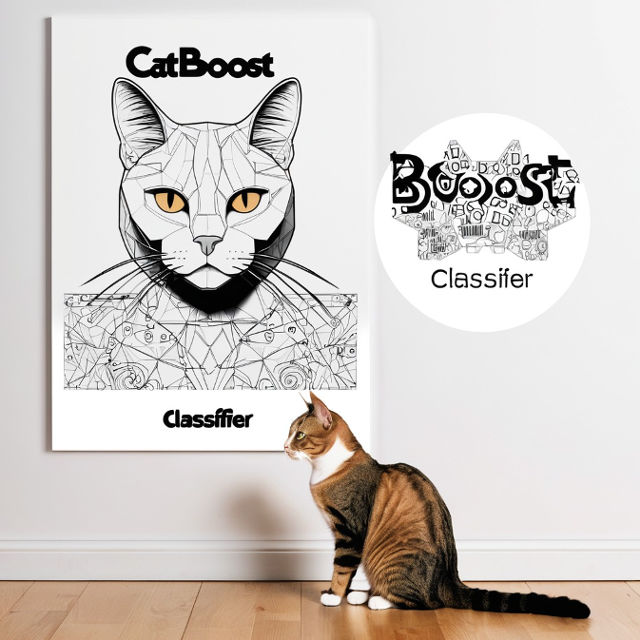

> ### ***1. Definition***:

***CatBoost** is a machine learning algorithm developed by Yandex, designed for categorical feature support and gradient boosting on decision trees. It is particularly effective in handling categorical variables without the need for extensive preprocessing.*

> ### ***2. Key Characteristics:***

   a. *Categorical Feature Support:*
   -  **CatBoost** efficiently handles categorical features without the need for manual encoding.

   b. *Gradient Boosting:*
   - Utilizes the gradient boosting framework for ensemble learning.

> ### ***3. Advantages:***

   - *a. High Performance:*
      - *Often exhibits superior performance compared to other gradient boosting algorithms.*

   - *b. Categorical Feature Handling:*
      - *Automatically handles categorical variables, reducing the need for preprocessing.*

   - *c. Robustness to Overfitting*
      - *Implements techniques to reduce overfitting, making it robust in various scenarios.*

> ### ***4. How it Works:***

- *a. Gradient Boosting:*
  - ***CatBoost** builds an ensemble of decision trees sequentially, with each tree correcting the errors of the previous ones.*

- *b. Categorical Features Handling:*
  - *Implements an efficient method for dealing with categorical variables, reducing the need for one-hot encoding.*

> ### ***Summary:***
*In summary, Cat Boost is a powerful gradient boosting algorithm known for its efficient handling of categorical features and often exhibits high performance in predictive tasks, making it a suitable choice for various machine learning applications.*


---
> #### ***13.2 Code Working***

The code performs a cross-validation loop using CatBoostClassifier, a gradient boosting algorithm. Here's a summarized explanation:

1. **Feature Preparation:**
   - The features to be used (`feat_cols`) are extracted from the dataset.

2. **Initialization:**
   - The number of folds (`n`) for cross-validation is set to 5.
   - CatBoost requires categorical features to be specified, so `cat_features` are identified based on the datatype.

3. **Cross-Validation Loop:**
   - The dataset is split into training and validation sets for each fold using StratifiedKFold.
   - CatBoostClassifier is initialized with specific parameters (e.g., evaluation metric, learning rate, iterations).
   - The model is trained on the training data and evaluated on the validation data, with AUC (Area Under the ROC Curve) as the evaluation metric.
   - AUC score for each fold is computed and printed.
   - Predictions are made on the validation set (`X_test_fold`) and the test dataset (`df_test`) using the trained model.

4. **Conclusion:**
   - The loop completes after processing all folds, with AUC scores printed for each fold.
   - Predictions from each fold are stored for further analysis or model ensembling.

Overall, the code efficiently performs cross-validation using CatBoostClassifier to evaluate model performance and make predictions on unseen data.

In [ ]:
# Features to use
feat_cols = X.columns

#Intilize folds 
n = 5

#Cat_features
cat_features = np.where(X.dtypes != np.float64)[0]

# Initialize StratifiedKFold
folds = StratifiedKFold(n_splits=n, random_state=42, shuffle=True)
test_preds = np.empty((n, len(df_test)))
auc_vals_cat = []

# Loop through folds 
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    ''' in each iteration of the cross-validation loop, the model is trained on a specific subset 
    of the data (training set) and validated on a different subset (validation set), facilitating the evaluation of the model's performance 
    across diverse portions of the dataset.'''
    X_train_fold, y_train_fold = X.iloc[train_idx], y.iloc[train_idx]
    X_test_fold, y_test_fold = X.iloc[valid_idx], y.iloc[valid_idx]
    
    train_pool = Pool(X_train_fold, y_train_fold,cat_features=cat_features)
    val_pool = Pool(X_test_fold, y_test_fold,cat_features=cat_features)
    
    cat_model = CatBoostClassifier(
    eval_metric='AUC',
    learning_rate=0.022,
    iterations=1000)
    cat_model.fit(train_pool, eval_set=val_pool,verbose=False)
    
    #Predicting Prohabilites 
    y_pred_val_cat = cat_model.predict_proba(X_test_fold[feat_cols])[:,1]
    auc_val = roc_auc_score(y_test_fold, y_pred_val_cat)
    print("AUC for fold ",n_fold,": ",auc_val)
    auc_vals_cat.append(auc_vals)
    
    y_pred_test_cat = cat_model.predict_proba(df_test[feat_cols])[:,1]
    test_preds[n_fold, :] = y_pred_test_cat
    print(f"------- Loop Completed for Fold {n_fold} --------")

In [ ]:
#The mean AUC value across all folds
mean_auc_cat = np.mean(auc_vals_cat)
print(f"\nMean AUC Of CatBoost : {mean_auc_cat}")

<!-- <center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:White;font-size:200%;font-weight: 500;color:Black;overflow:hidden;">Submission Of CatBoost Classifier ||| Override from Original Dataset.</span> -->

---
### ***13.1 Submission Of Catboost Classifier*** 
---
[Back To The Table Of Content](#table-of-content)


*Add a feature from the original data to account for leakage. for all matching rows between ORIGINAL and TRAIN, the labels are reversed*

### ***Credit : @paddykb***
https://www.kaggle.com/competitions/playground-series-s4e1/discussion/469859

**Added ~0.003 to LB score from data leakage. Best LB score without override for this notebook is 0.89315*

In [ ]:
y_pred_cat = test_preds.mean(axis=0)

In [ ]:
# making a Copy of the Test Data for Future Use 
df_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
df_test_ov = df_test.copy()

In [ ]:
#Importing the Orginal Dataset 
df_orig=pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
#Extracting the Column name From the Original Dataset
orig_cols=list(df_orig.columns.drop(['RowNumber','Exited']))

# Renaming the Column Exited With Exited_Orig in the Original Dataset
df_orig.rename(columns={'Exited':'Exited_Orig'},inplace=True)

# Here the Tricky part , Reversing the Label , Example Where [Exited is 1 , we replace it with 0] and Where Exited is 0 we replace it with 1.
df_orig['Exited_Orig']=df_orig['Exited_Orig'].map({0:1,1:0})

# Now we are Merging The Original Dataset And Testing Dataset It performs a left join based on specified columns (orig_cols)
# and selects specific columns of interest. The resulting DataFrame includes the original exit status ('Exited_Orig') for corresponding
# 'id' values, and missing values are filled with -1.
df_test_merg=df_test_ov.merge(df_orig,on=orig_cols,how='left')[['id','Exited_Orig']].fillna(-1)

# Creating a Submission Dataframe
df_sub = df_test_merg[['id','Exited_Orig']]

#Creating a New Column Named Exited , np.where Updates  If the 'Exited_Orig' column has a value of -1, it replaces it 
#with the predicted values (y_pred). If 'Exited_Orig' is not -1, it keeps the original values from 'Exited_Orig'
df_sub['Exited'] = np.where(df_sub.Exited_Orig==-1,y_pred_cat,df_sub.Exited_Orig)

# Drooping The Exited_orig Column
df_sub.drop('Exited_Orig',axis=1,inplace=True)

#Head Of Submission Data 
df_sub.head()

df_sub.to_csv("submission_cat3.csv",index=False)
print("Submission file created successfully!")


---
# ***14. Conclusions*** 
---
[Back To The Table Of Content](#table-of-content)


In [ ]:
fig = go.Figure()
# Background color
fig.update_layout(
    plot_bgcolor="#E8CE9D",  # Set background color for the entire plot area
    paper_bgcolor="#E8CE9D",  # Set background color for the outer area
)
# Define bar colors
bar_colors = ['#764a23', '#764a23']  # Colors for LightGBM and CatBoost respectively

fig.add_trace(go.Bar(
    x=['LightGBM Model Classifier', 'CatBoost Classifier'],
    y=[mean_auc_light, mean_auc_cat],
    name='AUC_Score',
    marker_color=bar_colors  # Set bar colors
))
# Update layout
fig.update_layout(
    title_text='AUC Comparison On Original Dataset',
    xaxis=dict(title='Classifier'),  # Set x-axis title
    yaxis=dict(title='AUC Score')  # Set y-axis title
)

fig.show()

In [ ]:
# Selcting Best and Highest AUC_Score  from Above trained Models 
models = ['LightGBM Classifier', 'CatBoost Classifier']
auc_Scores_models_scores = [mean_auc_light, mean_auc_cat]

# Find the index of the maximum AUc_Score
best_accuracy_index = auc_Scores_models_scores.index(max(auc_Scores_models_scores))

# Print the best model for accuracy
print(f'Best Accuracy: {auc_Scores_models_scores[best_accuracy_index]:.2f} with Model: {models[best_accuracy_index]}')

In [ ]:
print(f"So from the above trained models' results, we can conclude that:\n"
      f"  - Best Accuracy: {auc_Scores_models_scores[best_accuracy_index]:.2f} "
      f"with the Best Model: {models[best_accuracy_index]}.\n"
      f"  - According to my resources and training methods, "
      f"the results are printed above.\n"
      f"  - I hope you find this notebook useful.")

---
# ***The End***
--- 
***Hopefully, this notebook will be useful for everyone. Upvote if you like the work. Also, comment your feedback below, which would help me improve.*** 